# Lab05 Python Data Science with Pandas

## Please submit your finished lab05 jupyter notebook via pull request in GitHub

In [1]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt

## Part 1 <br /> Basics of Selecting and Slicing Data

In [2]:
# create a pandas dataframe from the location data set
df = pd.read_csv('C:/Users/Angle Lu/PTUA2023/Lab05/data/summer-travel-gps-full.csv')
df.head()

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
1,51.474005,-0.450999,05/14/2014 09:22,Hounslow,United Kingdom
2,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
3,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom
4,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom


In [5]:
# Q1: how to get 2 columns from the dataframe (city and country)?
df[['city','country']].head()

,city,country
0,West Drayton,United Kingdom
1,Hounslow,United Kingdom
2,Hounslow,United Kingdom
3,Hounslow,United Kingdom
4,Hounslow,United Kingdom


To get a single "cell's" value out of a dataframe, pass a column name, then a row label. This is equivalent to slicing the dataframe down to a single series, then slicing a single value out of that series using [ ] indexing.

In [8]:
# Q2: how to get the first 5 rows of the "city" column?
df['city'][0:5]

0    West Drayton
1        Hounslow
2        Hounslow
3        Hounslow
4        Hounslow
Name: city, dtype: object

### Using .loc[ ]

In [10]:
# Q3: how to use .loc to select the third row of the dataframe?
df.loc[2]

lat               51.478199
lon               -0.446081
date       05/14/2014 10:51
city               Hounslow
country      United Kingdom
Name: 2, dtype: object

In [11]:
# Q4: how to use .loc to select the first row in "country" column?
df['country'].loc[0]

'United Kingdom'

In [15]:
# Q5: how to select the first 4 rows of ['city', 'date'] columns?
df[['city','date']].loc[0:3]

,city,date
0,West Drayton,05/14/2014 09:07
1,Hounslow,05/14/2014 09:22
2,Hounslow,05/14/2014 10:51
3,Hounslow,05/14/2014 11:24


### Using .iloc[ ]

In [17]:
# use .iloc for integer position based indexing
# Q6: how to get the value from the row in position 3 and the column in position 2
df.iloc[2][1]

-0.446081

In [18]:
# Q7: how to use iloc to select every 300th row from a data set
df.iloc[299]

lat               41.377076
lon                2.151207
date       05/19/2014 22:18
city              Barcelona
country               Spain
Name: 299, dtype: object

## Part 2 <br /> How to select rows by some value(s)

In [4]:
# load a reduced set of gps data
df = pd.read_csv('C:/Users/Angle Lu/PTUA2023/Lab05/data/summer-travel-gps-simplified.csv')
df.tail()

,lat,lon,date,city,country
173,41.044556,28.983286,07/08/2014 16:44,Istanbul,Turkey
174,41.008992,28.968268,07/08/2014 20:03,Istanbul,Turkey
175,41.043487,28.985488,07/08/2014 22:18,Istanbul,Turkey
176,40.977637,28.823879,07/09/2014 09:03,Istanbul,Turkey
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany


In [26]:
# Q9: create a Series of true/false, indicating if each "city" row in the column is equal to "Munich"
df['Munich_or_not'] = (df['city'] == 'Munich')
#df.tail() #for checking

,lat,lon,date,city,country,Munich_or_not
173,41.044556,28.983286,07/08/2014 16:44,Istanbul,Turkey,False
174,41.008992,28.968268,07/08/2014 20:03,Istanbul,Turkey,False
175,41.043487,28.985488,07/08/2014 22:18,Istanbul,Turkey,False
176,40.977637,28.823879,07/09/2014 09:03,Istanbul,Turkey,False
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany,True


In [37]:
# pandas logical operators are: | for or, & for and, ~ for not
# these must be grouped by using parentheses
# Q10: what cities were visited in spain that were not barcelona? Create a dataframe for it.
df10 = df[(df['country']=='Spain') &(df['city']!='Barcelona')]
#df10 #for checking

,lat,lon,date,city,country,Munich_or_not
24,41.303911,2.105931,05/18/2014 22:35,El Prat de Llobregat,Spain,False
25,41.289946,2.064590,05/18/2014 23:04,Viladecans,Spain,False
126,41.306752,2.097624,06/12/2014 17:19,El Prat de Llobregat,Spain,False
127,41.304333,2.072728,06/12/2014 17:49,El Prat de Llobregat,Spain,False
131,41.358460,2.128701,06/13/2014 11:35,Hospitalet de Llobregat,Spain,False
138,41.294761,2.059722,06/20/2014 22:15,Viladecans,Spain,False


In [33]:
# Q11: select rows where either the city is munich, or the country is serbia
df[(df['city'] == 'Munich')|(df['country'] == 'Serbia')]

,lat,lon,date,city,country,Munich_or_not
139,44.821164,20.289821,06/21/2014 01:59,Belgrade,Serbia,False
140,44.820414,20.463465,06/21/2014 18:44,Belgrade,Serbia,False
141,44.761583,19.577904,06/22/2014 07:58,Slepčević,Serbia,False
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany,True


In [40]:
# Q12: how many observations are west of the prime meridian?
print("There are %s observations in the west of the prime meridian."%len(df[df['lon'] < 0]))

There are 24 observations in the west of the prime meridian.


In [43]:
# Q13: get all rows that contain a city that starts with the letter G
city = df['city'].unique()
G_city = []
for n in city:
    if n[0] == 'G':
        G_city.append(n)

df[df['city'].isin(G_city)]

,lat,lon,date,city,country,Munich_or_not
62,50.273632,18.729429,06/02/2014 06:39,Gliwice,Poland,False
114,48.282940,8.199630,06/10/2014 13:33,Gutach,Germany,False
115,48.389029,8.021342,06/10/2014 13:48,Gengenbach,Germany,False
152,40.187825,20.079303,07/04/2014 17:42,Gjirokastër,Albania,False


In [52]:
# Q14: how many unique cities and countries in the dataset? 
# Also can you check missing values for the dataframe
city_l = len(df['city'].unique())
print("There are %s unique cities in the dataset."%city_l)
cou_l = len(df['country'].unique())
print("There are %s unique countries in the dataset."%cou_l)
print("Below is the summary of missing values in the dataset.")
df.isnull().sum()

There are 91 unique cities in the dataset.
There are 15 unique countries in the dataset.
Below is the summary of missing values in the dataset.


lat              0
lon              0
date             0
city             0
country          0
Munich_or_not    0
dtype: int64

In [6]:
# Q15: group by country name and show the city names in each of the country
df.groupby('country')['city'].unique()

country
Albania                                                [Berat, Gjirokastër]
Bosnia and Herzegovina                                   [Sarajevo, Mostar]
Croatia                                           [Ploče, Split, Dubrovnik]
Czech Republic            [Novy Bohumin, Hranice, Prerov, Ústí nad Orlic...
Germany                   [Kümmersbruck, Winkelhaid, Kammerstein, Ellhof...
Greece                    [Kakavia, Dytiki Ellada, Peloponnese, Athens, ...
Kosovo                                                            [Prizren]
Macedonia (FYROM)                                                   [Ohrid]
Montenegro                                                          [Kotor]
Poland                    [Zendek, Silesian Voivodeship, Dabrowa Gornicz...
Portugal                  [Lisbon, Algueirão-Mem Martins, Sintra, Azambu...
Serbia                                                [Belgrade, Slepčević]
Spain                     [El Prat de Llobregat, Viladecans, Barcelona, ...
Turk

## Part 3 <br /> How to select based on a date-time values

In [43]:
# load the location data set, indexed by the date field
# and, parse the dates so they're no longer strings but now rather Python datetime objects
# this lets us do date and time based operations on the data set
dt = pd.read_csv('C:/Users/Angle Lu/PTUA2023/Lab05/data/summer-travel-gps-full.csv', index_col='date', parse_dates=True)
dt.head()
# print(dt.shape) # for Q17

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [28]:
# Q16: is the timestamp index unique? How can you use code to find it? 
print(dt[dt.index.duplicated()])

                           lat        lon           city country
date                                                            
2014-07-05 00:52:00  38.541479  21.284091  Dytiki Ellada  Greece


In [78]:
# Q17: drop duplicate index 
dt2 = dt[~dt.index.duplicated()]
print(dt2.shape)
print(dt2.index.is_unique)
dt2.head()

(1758, 4)
True


,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [45]:
# Q18: create a weekday and a weekend dataframe
dt2_weekday = dt2[dt2.index.dayofweek <= 4]
dt2_weekend = dt2[dt2.index.dayofweek > 4]

print(dt2_weekday.head())
print(dt2_weekend.head())

                           lat       lon          city         country
date                                                                  
2014-05-14 09:07:00  51.481292 -0.451011  West Drayton  United Kingdom
2014-05-14 09:22:00  51.474005 -0.450999      Hounslow  United Kingdom
2014-05-14 10:51:00  51.478199 -0.446081      Hounslow  United Kingdom
2014-05-14 11:24:00  51.478199 -0.446081      Hounslow  United Kingdom
2014-05-14 11:38:00  51.474146 -0.451562      Hounslow  United Kingdom
                           lat       lon    city   country
date                                                      
2014-05-17 00:09:00  38.711824 -9.137308  Lisbon  Portugal
2014-05-17 00:39:00  38.711833 -9.137317  Lisbon  Portugal
2014-05-17 01:09:00  38.711822 -9.137277  Lisbon  Portugal
2014-05-17 01:39:00  38.711823 -9.137273  Lisbon  Portugal
2014-05-17 01:54:00  38.711828 -9.137279  Lisbon  Portugal


C:\Users\Angle Lu\AppData\Local\Temp\ipykernel_21888\857668390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt2['weekday'] = dt2.index.dayofweek


(Text(0, 0.5, 'Count'), Text(0.5, 0, 'Weekday'))

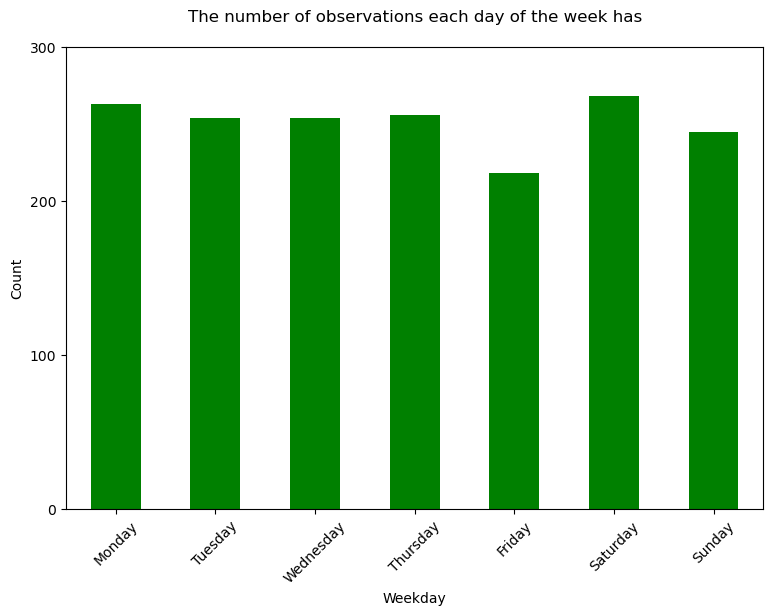

In [91]:
# Q19: calculate and plot the number of observations each day of the week has
dt2['weekday'] = dt2.index.dayofweek

result = dt2.groupby('weekday').count().sort_index()
result.index = pd.Series(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plot1 = result['country'].plot(kind='bar',yticks=[0,100,200,300],figsize=(9,6), color = 'green', rot =45, title = 'The number of observations each day of the week has\n')
plot1.set_ylabel('Count'),plot1.set_xlabel('Weekday')


## Reference
Index: https://www.jianshu.com/p/23c93e0f369a<br>
DatetimeIndex: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.dayofweek.html<br>
Plot: https://blog.csdn.net/h_hxx/article/details/90635650